In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

def absError(approx, actual):
    return np.abs(approx-actual)

def relativeError(approx, actual):
    return np.abs((approx-actual)/actual)

def errorEvaluation(max_derivative,x, x_values):
    n = len(x_values)
    product = max_derivative/math.factorial(n)
    for i in range(n):
        product*=(x-x_values[i])
    return np.abs(product)

def chebishev(n):
    result = np.array([])
    for k in range(1, n+1):
        num = np.cos(np.pi*((2*k-1)/(2*n)))
        result = np.append(result, num)
    return result

In [108]:
#Lagrange#

def l(x, x_values, idx):
    product = 1;
    for k in range(len(x_values)):
        if(k!=idx):
            product*=(x-x_values[k])/(x_values[idx]-x_values[k])
    return product

def lagrange_poly(x, x_values, y_values):
    sum = 0
    for i in range (len(x_values)):
        sum+=y_values[i]*l(x, x_values, i)
    return sum

In [109]:
#Newton#

def divided_difference(x_values, y_values):
    if(len(x_values)==1):
        return y_values[0]
    return (divided_difference(x_values[1:], y_values[1:]) - divided_difference(x_values[:-1], y_values[:-1])) / (x_values[-1] - x_values[0])

def newton_poly(x, x_values, y_values):
    sum = divided_difference(x_values[:1], y_values[:1])
    n = len(x_values)
    for k in range (1, n):
        temp = divided_difference(x_values[:k+1], y_values[:k+1])
        for i in range (k):
            temp*=(x-x_values[i])
        sum+=temp
    return sum

In [110]:
#Hermit#

def divided_difference_extended(x_values, y_values, l, r):
    if x_values[l] == x_values[r]:
        return y_values[np.argmax(x_values == x_values[l]) + r - l] / math.factorial(r-l)
    return (divided_difference_extended(x_values, y_values, l+1, r) - divided_difference_extended(x_values, y_values, l, r - 1)) / (x_values[r] - x_values[l])

def hermit_poly(x, x_values, y_values):
    sum = 0
    n = len(x_values)
    for i in range(n):
        subsum = divided_difference_extended(x_values, y_values, 0, i)
        for k in range (i):
            subsum*=(x-x_values[k])
        sum+=subsum
    return sum

Задача 1. Да се построи интерполационният полином на Лагранж за
таблицата:

x     | 0   | 0.5 | 1   | 1.5
----- | --- | --- | --- | ----
f(x)  | 1   | 2   | 3   | 4

a) По метода на неопределените коефициенти, т.е. като се реши получената
от интерполационните условия линейна система за коефициентите
на алгебричния полином.

б) С формулата на Лагранж.


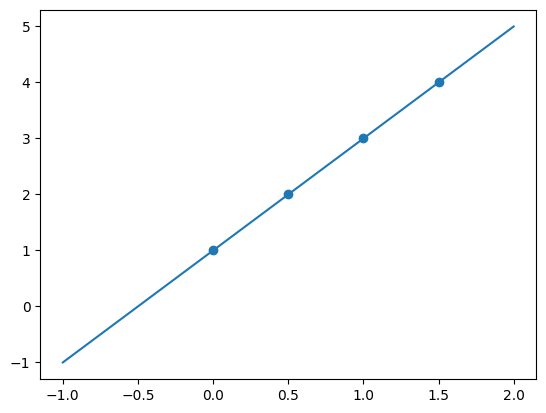

In [111]:
def zad1b():
    x_axis = np.linspace(-1, 2, 200)
    x_values = np.array([0,0.5,1,1.5])
    y_values = np.array([1,2,3,4])
    y_axis = lagrange_poly(x_axis, x_values, y_values)

    plt.scatter(x_values, y_values)
    plt.plot(x_axis, y_axis, label = "1. b)")
    plt.show()

zad1b()

## Задача 2
Относителната плътност на въздуха ρ е измерена на различна височина с висока точност. Резултатите от измерванията са систематизирани в следната таблица:

| h (km) | 0 | 1.525 | 3.05 | 4.575 | 6.1 |
|--------|---|--------|------|--------|-----|
| ρ      | 1 | 0.8617 | 0.7385 | 0.6292 | 0.5328 |

Като използвате интерполационната формула на Лагранж, определете приблизително каква е относителната плътност на височина 3 km.  
Илюстрирайте графично как ρ се изменя в зависимост от височината, като построите графиката на полинома и точките в една координатна система.

0.742312933103883


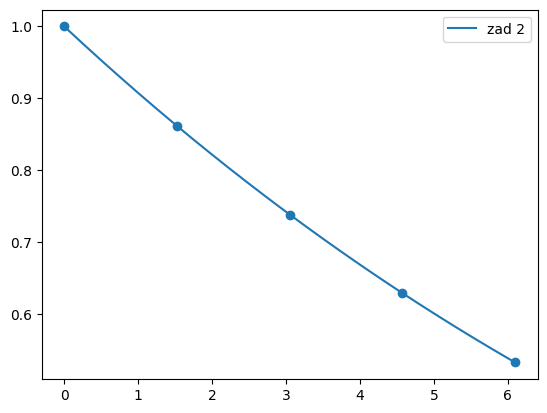

In [112]:
def zad2():
    x_values = np.array([0,1.525, 3.05, 4.575, 6.1])
    y_values = np.array([1,0.8617,0.7385, 0.6292, 0.5328])
    print(lagrange_poly(3, x_values, y_values))
    x_axis = np.linspace(0, 6.1, 500)
    y_axis = lagrange_poly(x_axis, x_values, y_values)
    plt.scatter(x_values, y_values)
    plt.plot(x_axis, y_axis, label = "zad 2")
    plt.legend()
    plt.show()

zad2()

## Задача 3
Да се намери приблизено \( f(x) = e^x \) за \( x = 0.15 \), като се използва таблицата:

| x | 0 | 0.1 | 0.2 | 0.3 |
|---|---|------|------|------|
| f(x) | 1 | 1.10517 | 1.2214 | 1.34986 |

Да се направи оценка на грешката от направеното приближение и да се начертаят графиките на абсолютната грешка и получената мажорираща функция от теоремата за оценка на грешката.


1.161829375


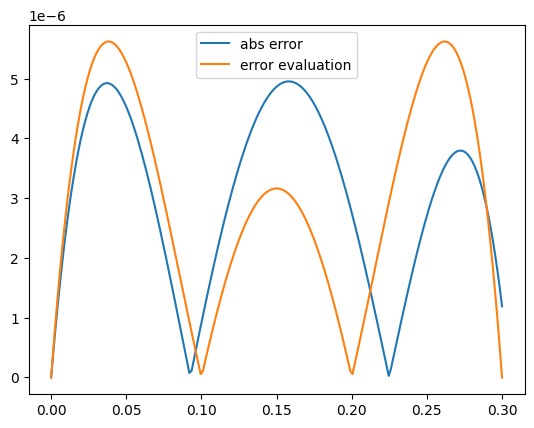

In [113]:
def f3(x):
    return np.e**x

def zad3():
    x_values = np.array([0,0.1,0.2,0.3])
    y_values = np.array([1,1.10517, 1.2214, 1.34986])
    print(lagrange_poly(0.15, x_values, y_values))
    x_axis = np.linspace(0, 0.3, 200)
    y_axis1 = absError(lagrange_poly(x_axis, x_values, y_values), f3(x_axis))
    plt.plot(x_axis, y_axis1, label = "abs error")
    y_axis2 = errorEvaluation(f3(0.3), x_axis, x_values)
    plt.plot(x_axis, y_axis2, label="error evaluation")
    plt.legend()
    plt.show()

zad3()

## Задача 4
Като използвате интерполационната формула на Нютон с разделени разлики, намерете полинома от възможно най-ниска степен, който удовлетворява условията:

| x | -3 | 2 | -1 | 3 | 1 |
|---|----|----|----|----|----|
| y | 0  | 5 | -4 | 12 | 0 |

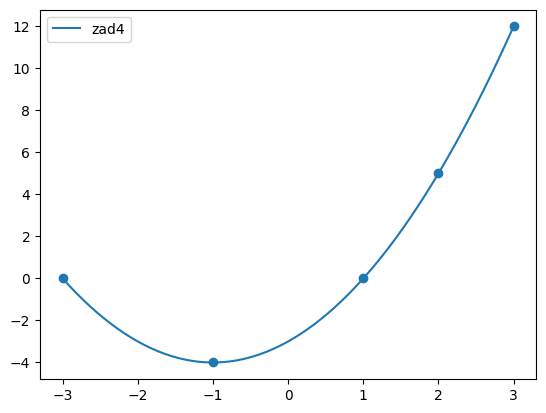

In [114]:
def zad4():
    x_values = np.array([-3, -1, 1, 2, 3])
    y_values = np.array([0, -4, 0, 5, 12])
    x_axis = np.linspace(-3, 3, 200)
    y_axis = newton_poly(x_axis, x_values, y_values)
    plt.scatter(x_values, y_values)
    plt.plot(x_axis, y_axis, label = "zad4")
    plt.legend()

zad4()

## Задача 5

Дадени са:

| x     | 1 | 2 | 2.5 | 3 | 4 | 5 |
|-------|---|---|-----|---|---|---|
| f(x)  | 0 | 5 | 6.5 | 7 | 3 | 1 |

Да се намери стойността на f(3.4) чрез интерполационни полиноми от степени 1, 2 и 3.  
Възлите трябва да се избират така, че да са максимално близо до 3.4.

### Забележка:
Формулата за грешката е:

R(x) = f^(n+1)(ξ) / (n+1)! * ω(x)

По-добра точност се получава, когато възлите са възможно най-близо до 3.4.


In [115]:
def zad5():
    x_values = np.array([1,2,2.5,3,4,5])
    y_values = np.array([0, 5, 6.5, 7, 3, 1])
    print(newton_poly(3.4, x_values[3:5], y_values[3:5]))
    print(newton_poly(3.4, x_values[2:5], y_values[2:5]))
    print(newton_poly(3.4, x_values[1:5], y_values[1:5]))

zad5()

5.4
6.200000000000001
6.343999999999999


## Задача 6
Дадена е функцията:
\[
f(x) = ln(x+2)
\]

Да се оцени грешката:
\[
R(x) = |f(x) - L_3(f; x)|
\]

Възли:  
- $x_0=-1$, $x_1=-0.3$, $x_2=0.3$, $x_3=1$  
- Чебишови възли в интервала $[-1,1]$

Да се сравни в кой случай оценката на грешката е по-добра.

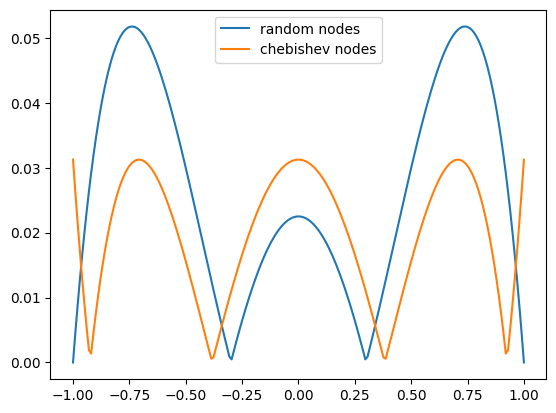

In [116]:
def f6(x):
    return np.log(x+2)

def zad6():
    x_values1 = np.array([-1,-0.3,0.3,1])
    x_values2 = chebishev(4)
    x_axis = np.linspace(-1,1,200)
    max_derivative = 6
    y_axis1 = errorEvaluation(max_derivative , x_axis, x_values1)
    y_axis2 = errorEvaluation(max_derivative , x_axis, x_values2)
    plt.plot(x_axis, y_axis1, label="random nodes")
    plt.plot(x_axis, y_axis2, label="chebishev nodes")
    plt.legend()
    plt.show()

zad6()
# chebishev got smaller error obviously

## Задача 7
Намерете полинома, удовлетворяващ интерполационните условия:

- \(P(0) = 8\)  
- \(P(1) = 9\)  
- \(P'(1) = 2\)  
- \(P(2) = 12\)  
- \(P'(2) = 4\)

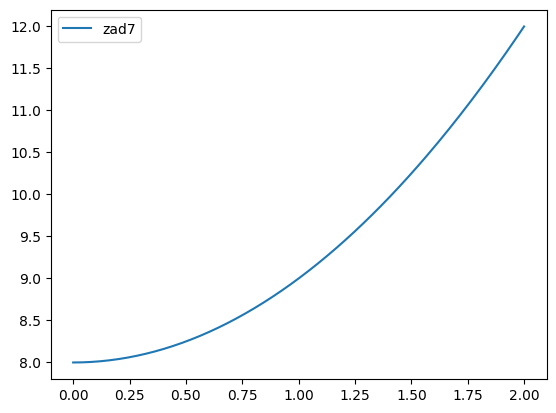

In [117]:
def zad7():
    x_values = np.array([0,1,1,2,2])
    y_values = np.array([8,9,2,12,4])
    x_axis = np.linspace(0, 2, 200)
    y_axis = hermit_poly(x_axis, x_values, y_values)
    plt.plot(x_axis, y_axis, label = "zad7")
    plt.legend()

zad7()

## Задача 8
Да се приближи функцията $f(x)=\cos x$:

1. Полином на Лагранж за възлите  
   $0,\ \pi/4,\ \pi/2$

2. Полином на Ермит за възлите  
   $0,\ \pi/2$  
   с кратности 2 и 1.

Да се построят графиките на относителните грешки (по абсолютна стойност) в интервала на интерполация и за двата случая. Да се сравни къде аппроксимацията е по-добра.

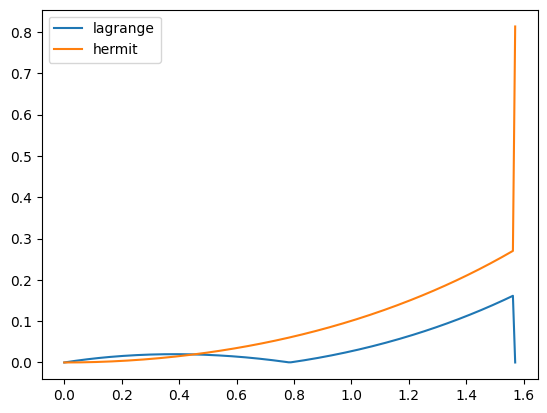

In [118]:
def f8(x):
    return np.cos(x)

def zad8():
    x_values_lagr = np.array([0, np.pi/4, np.pi/2])
    y_values_lagr = np.array([f8(x_values_lagr[0]),f8(x_values_lagr[1]),f8(x_values_lagr[2])])
    x_values_hermit = np.array([0, 0, np.pi/2])
    y_values_hermit = np.array([f8(x_values_hermit[0]), -np.sin(x_values_hermit[1]), f8(x_values_hermit[2])])
    x_axis = np.linspace(0, np.pi/2, 200)
    y_axis1 = relativeError(lagrange_poly(x_axis, x_values_lagr, y_values_lagr), f8(x_axis))
    y_axis2 = relativeError(hermit_poly(x_axis, x_values_hermit, y_values_hermit), f8(x_axis))
    plt.plot(x_axis, y_axis1, label = "lagrange")
    plt.plot(x_axis, y_axis2, label="hermit")
    plt.legend()

zad8()
    

## Задача 9

Да се дефинира функция:

    lagrange_poly(n, x0, h, f, x)

която конструира интерполационния полином на Лагранж от степен n  
за възлите:

    x_i = x0 + i * h    за i = 0, 1, ..., n

In [119]:
def lagrange_poly(n, x0, h, f, x):
    x_values = np.array([])
    y_values = np.array([])
    for i in range (n+1):
        el = x0+i*h
        x_values = np.append(x_values, el)
        y_values = np.append(y_values, f(el))

    return lagrange_poly(x, x_values, y_values)

## Задача 10
Като използвате подходящ базис, намерете обобщен полином, който описва данните:

| x | 0.2 | 0.5 | 0.7 | 0.8 | 1 |
|---|-----|-----|-----|-----|----|
| y | 15.7927 | 35.4933 | 67.5412 | 95.2408 | 195.334 |

Илюстрирайте графично, като построите графиката на полинома и точките в една координатна система.


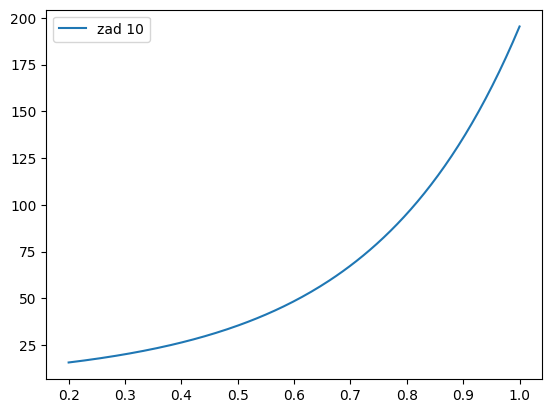

In [120]:
def exp_positive_basis(n, x):
    basis = np.array([])
    for i in range(n):
        basis = np.append(basis, np.exp(i * x))
    return basis

def exp_poly_1(x):
    poly = 0
    for i in range(len(x_values)):
        poly += sol[i]* np.exp(i*x)
    
    return poly

x_values = np.array([0.2, 0.5, 0.7, 0.8, 1])
y_values = np.array([15.7927, 35.4933, 67.5412, 95.2408, 195.334])
n = len(x_values)
x_axis = np.linspace(0.2, 1, 200)

A=np.zeros([n,n])
for i in range(n):
    A[i] = exp_positive_basis(n, x_values[i])
sol = np.linalg.solve(A, y_values)

y_axis = exp_poly_1(x_axis)

plt.plot(x_axis, y_axis, label = "zad 10")
plt.legend()

## Задача 11
Дадени са данни за усвояването на лекарство от организма:

| t (h) | 0 | 2 | 4 | 6 | 8 |
|--------|---|----|----|----|----|
| концентрация (%) | 0.1 | 0.009 | 0.0011 | 0.00003 | 0.0000012 |

Да се намери обобщен полином по подходящ базис, който описва процеса.

### Примерни базиси:
1. $\{1,\ x,\ x^2,\ \dots,\ x^n\}$
2. $\{1,\ \sin x,\ \cos x,\ \sin 2x,\ \cos 2x,\ \dots\}$
3. $\{1,\ e^x,\ e^{2x},\ \dots,\ e^{nx}\}$
4. $\left\{\frac{1}{1+x},\ \frac{1}{2+x},\ \dots\right\}$
5. $\{1,\ e^{-x},\ e^{-2x},\ \dots,\ e^{-nx}\}$
6. $\left\{\frac{1}{1-x},\ \frac{1}{2-x},\ \dots\right\}$

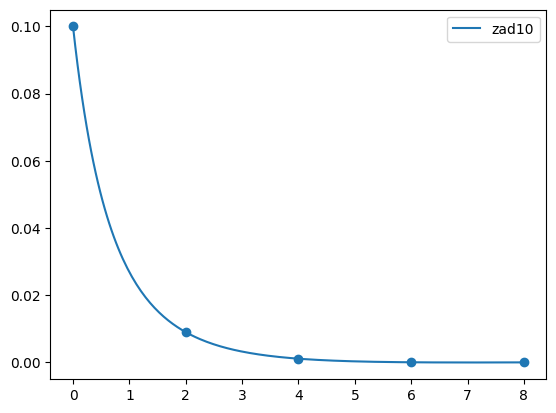

In [121]:
def exponential_basis(x):
    return np.array([1/(1+x), 1/(2+x), 1/(3+x), 1/(4+x), 1/(5+x)])

def createPoly(x):
    coeff = np.linalg.solve(A, y_values)
    sum = 0
    for i in range (n):
        sum+=coeff[i]*(1/(i+1+x))
    return sum

x_values = np.array([0,2,4,6,8])
y_values = np.array([0.1,0.009,0.0011, 0.00003, 0.0000012])
n = len(x_values)

A = np.zeros([n, n])
for i in range(n):
    A[i] = exponential_basis(x_values[i])

x_axis = np.linspace(0, 8, 200)
y_axis = createPoly(x_axis)

plt.plot(x_axis, y_axis, label = "zad10")
plt.scatter(x_values, y_values)
plt.legend()